In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train-data.csv")

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df.duplicated().sum()


0

In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
df.drop("New_Price", axis=1, inplace=True)

In [9]:
#imputing null values

from sklearn.impute import SimpleImputer

null_col = ['Mileage', 'Engine' , 'Power','Seats']

imputer = SimpleImputer(strategy='most_frequent')
df[null_col] = imputer.fit_transform(df[null_col])

In [10]:
df = df.convert_dtypes()

In [11]:
# imputing zeros in seat columns
df['Seats'].replace(to_replace=0 ,value= df['Seats'].mode()[0],inplace=True)

In [12]:
df[df['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5,2.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5,1.3
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5,2.1
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,1.2
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,5,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6,1.7


In [13]:
indx = df[df['Power'] == 'null bhp'].index

In [14]:
df.drop(indx,axis=0,inplace=True)

In [15]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5,4.0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8,2.9
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5,2.65


In [16]:
dirty_cols = ['Mileage', 'Engine', 'Power']

In [17]:
for col in dirty_cols:
    df[col] = df[col].apply(lambda x : float(x.split()[0]))

In [18]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74


In [19]:
df["Name"].nunique()

1830

In [20]:
# checking the unique values
df["Name"].nunique()

1830

In [21]:
print("Percentage of uniques",round(df["Name"].nunique()/df.shape[0]*100),"%")


Percentage of uniques 31 %


In [22]:
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5912, dtype: string

Above we can observe that first name is the car's brand name 

so lets extract the first name as brand name

In [23]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0])

In [24]:
df["Brand"].nunique()


30

Another observation that first two word can express which car we want.

So, let's change name column with just first 2 words.

In [25]:
df["Name"] = df["Name"].apply(lambda x : " ".join(x.split()[:2]))


In [26]:
df["Name"].nunique()

209

Now we can make use of name column.

In [27]:
df = df.convert_dtypes()

In [28]:
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
299,Audi A6,Kochi,2015,31652,Diesel,Automatic,First,17.68,1968,174.33,5,26.78,Audi
2965,Mahindra Ssangyong,Kochi,2014,58995,Diesel,Manual,First,12.83,2696,162.0,7,9.25,Mahindra
3609,Volkswagen Polo,Pune,2011,36431,Petrol,Manual,First,16.2,1199,74.0,5,2.7,Volkswagen
4461,Hyundai Elite,Kochi,2016,37540,Petrol,Manual,First,18.6,1197,81.86,5,6.22,Hyundai
1313,Hyundai Verna,Chennai,2008,121097,Diesel,Manual,Second,24.0,1396,88.76,5,1.9,Hyundai


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5912 non-null   string 
 1   Location           5912 non-null   string 
 2   Year               5912 non-null   Int64  
 3   Kilometers_Driven  5912 non-null   Int64  
 4   Fuel_Type          5912 non-null   string 
 5   Transmission       5912 non-null   string 
 6   Owner_Type         5912 non-null   string 
 7   Mileage            5912 non-null   Float64
 8   Engine             5912 non-null   Int64  
 9   Power              5912 non-null   Float64
 10  Seats              5912 non-null   Int64  
 11  Price              5912 non-null   Float64
 12  Brand              5912 non-null   string 
dtypes: Float64(3), Int64(4), string(6)
memory usage: 687.0 KB


In [30]:
df.describe()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5.912000e+03,5912.000000,5912.000000,5912.000000,5912.00000,5912.000000
mean,2013.450609,5.837766e+04,18.231778,1622.857070,113.014026,5.28180,9.584919
std,3.188638,9.189848e+04,4.431628,600.877459,53.797403,0.80269,11.233694
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.00000,0.440000
25%,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.00000,3.500000
50%,2014.000000,5.286250e+04,18.200000,1493.000000,94.000000,5.00000,5.700000
75%,2016.000000,7.245375e+04,21.100000,1984.000000,138.100000,5.00000,10.012500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.00000,160.000000


# Understanding the data by plots

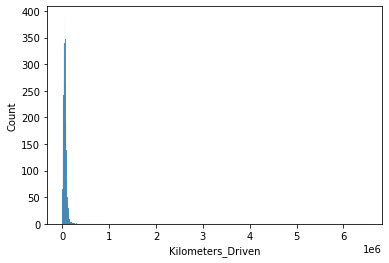

In [31]:
sns.histplot(data = df , x = 'Kilometers_Driven');

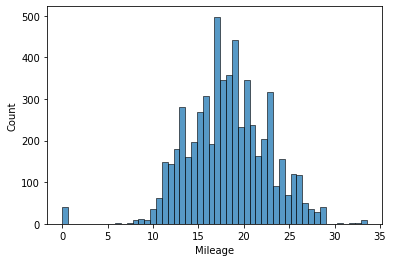

In [32]:
sns.histplot(data = df , x = 'Mileage');


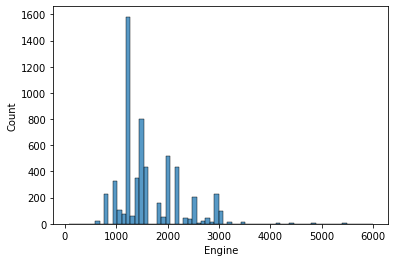

In [33]:
sns.histplot(data = df , x = 'Engine');

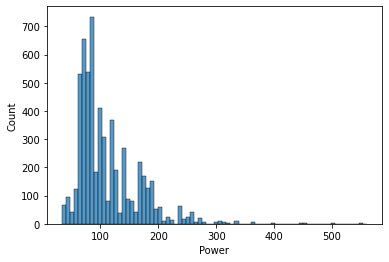

In [34]:
sns.histplot(data = df , x = 'Power');


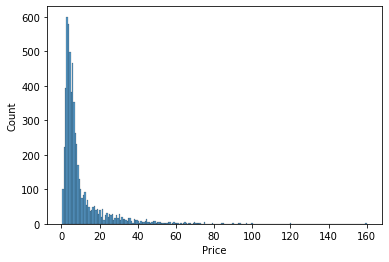

In [35]:
sns.histplot(data = df , x = 'Price');

In [36]:
#extracting nummerical columns

numerical_cols = ['Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power','Price']


In [37]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5,1.75,Maruti
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5,12.5,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5,4.5,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.0,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74.0,5,4.75,Maruti
6015,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71.0,5,4.0,Hyundai
6016,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112.0,8,2.9,Mahindra
6017,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5,2.65,Maruti


# Data Pre-processing 

## converting categorical to numerical 

In [38]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [39]:
df['Owner_Type'] = df['Owner_Type'].map(transformation)

In [40]:
import category_encoders as ce

In [41]:
Nominal_data = ['Name','Location','Fuel_Type','Transmission','Brand']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
df = binaryencoder.fit_transform(df)

In [42]:
Numerical_data = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']

In [43]:
from sklearn.preprocessing import PowerTransformer

In [44]:
new_df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns, index=df.index)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [45]:
new_df.shape

(5912, 30)

# splitting the data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X, y = new_df.drop("Price",axis=1) , new_df["Price"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [49]:
X_train.shape

(5320, 29)

In [50]:
X_test.shape

(592, 29)

In [51]:
y_test.shape

(592,)

In [52]:
y_train.shape

(5320,)

# Applying Standard Scalar

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
#checking the mean value after scaling
scaler.mean_

array([-0.00949434,  0.00208955,  0.00905834, -0.00184291, -0.00328928,
       -0.00736779, -0.00284878, -0.00111997,  0.00042886, -0.00626659,
       -0.00186139,  0.00344421,  0.00348911, -0.00479766, -0.00333437,
        0.00584403, -0.00057637,  0.00266544, -0.00266544, -0.0009842 ,
        0.00158574, -0.00083258,  0.00323177, -0.00366751, -0.0043158 ,
        0.00076986,  0.0027894 ,  0.00261987, -0.00100608])

In [55]:
X_train

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,Location_1,...,Owner_Type,Mileage,Engine,Power,Seats,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
5469,-0.285649,-0.502800,-0.733199,1.149022,-0.932262,0.995275,1.105315,-1.073755,-0.621684,-0.827533,...,-2.151627,0.032941,-0.707831,-0.572966,-0.293644,-0.289785,-0.605492,-0.864915,0.909677,-1.085881
1090,-0.285649,1.988863,-0.733199,1.149022,-0.932262,-1.004747,-0.904720,0.931311,1.608533,-0.827533,...,-2.151627,-0.592089,0.761287,1.245652,-0.293644,-0.289785,-0.605492,1.156183,-1.099292,-1.085881
4223,3.500801,-0.502800,1.363886,-0.870305,1.072660,0.995275,-0.904720,0.931311,-0.621684,1.208411,...,0.464175,-1.561889,1.900284,1.855968,-2.121572,-0.289785,1.651550,1.156183,-1.099292,0.920911
2714,-0.285649,-0.502800,-0.733199,1.149022,-0.932262,0.995275,1.105315,-1.073755,-0.621684,-0.827533,...,0.464175,-0.265404,-0.707831,-0.511262,-0.293644,-0.289785,-0.605492,-0.864915,0.909677,-1.085881
4193,-0.285649,1.988863,1.363886,-0.870305,-0.932262,-1.004747,-0.904720,-1.073755,-0.621684,1.208411,...,0.464175,-0.317284,0.761287,0.755996,-0.293644,-0.289785,-0.605492,1.156183,0.909677,0.920911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,-0.285649,-0.502800,-0.733199,-0.870305,1.072660,0.995275,-0.904720,0.931311,1.608533,-0.827533,...,0.464175,1.971095,-0.579346,-0.786274,-0.293644,-0.289785,-0.605492,-0.864915,-1.099292,0.920911
2567,-0.285649,-0.502800,1.363886,-0.870305,-0.932262,0.995275,-0.904720,0.931311,-0.621684,1.208411,...,0.464175,0.335960,-1.011347,-1.022662,-0.293644,-0.289785,-0.605492,-0.864915,0.909677,-1.085881
3678,-0.285649,-0.502800,1.363886,-0.870305,-0.932262,-1.004747,-0.904720,0.931311,-0.621684,-0.827533,...,0.464175,0.171162,-0.707831,-0.506695,-0.293644,-0.289785,-0.605492,-0.864915,0.909677,-1.085881
5805,-0.285649,1.988863,-0.733199,-0.870305,-0.932262,-1.004747,-0.904720,0.931311,-0.621684,1.208411,...,0.464175,-0.662833,0.162133,0.089299,-0.293644,3.450840,-0.605492,1.156183,-1.099292,0.920911


In [56]:
X_train_scaled

array([[-0.28048157, -0.50410853, -0.74017667, ..., -0.86735556,
         0.90728527, -1.08478542],
       [-0.28048157,  1.98369981, -0.74017667, ...,  1.15292972,
        -1.10218918, -1.08478542],
       [ 3.56529665, -0.50410853,  1.3510288 , ...,  1.15292972,
        -1.10218918,  0.9218413 ],
       ...,
       [-0.28048157, -0.50410853,  1.3510288 , ..., -0.86735556,
         0.90728527, -1.08478542],
       [-0.28048157,  1.98369981, -0.74017667, ...,  1.15292972,
        -1.10218918,  0.9218413 ],
       [-0.28048157,  1.98369981, -0.74017667, ...,  1.15292972,
        -1.10218918, -1.08478542]])

In [57]:
X_train.describe()

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,Location_1,...,Owner_Type,Mileage,Engine,Power,Seats,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,...,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,-0.009494,0.002090,0.009058,-0.001843,-0.003289,-0.007368,-0.002849,-0.001120,0.000429,-0.006267,...,-0.000984,0.001586,-0.000833,0.003232,-0.003668,-0.004316,0.000770,0.002789,0.002620,-0.001006
std,0.984666,1.001643,1.002906,0.999835,0.999858,1.000102,0.999804,1.000173,1.000306,0.998880,...,1.000962,0.996682,1.001523,1.000423,0.999665,0.993239,1.000496,1.000496,0.999842,1.000176
min,-0.285649,-0.502800,-0.733199,-0.870305,-0.932262,-1.004747,-0.904720,-1.073755,-0.621684,-0.827533,...,-2.177255,-3.508993,-12.025037,-3.264415,-9.283368,-0.289785,-0.605492,-0.864915,-1.099292,-1.085881
25%,-0.285649,-0.502800,-0.733199,-0.870305,-0.932262,-1.004747,-0.904720,-1.073755,-0.621684,-0.827533,...,0.464175,-0.689281,-0.705250,-0.749103,-0.293644,-0.289785,-0.605492,-0.864915,-1.099292,-1.085881
50%,-0.285649,-0.502800,-0.733199,-0.870305,-0.932262,-1.004747,-0.904720,0.931311,-0.621684,-0.827533,...,0.464175,-0.035804,-0.038390,-0.151070,-0.293644,-0.289785,-0.605492,-0.864915,0.909677,0.920911
75%,-0.285649,-0.502800,1.363886,1.149022,1.072660,0.995275,1.105315,0.931311,1.608533,1.208411,...,0.464175,0.638697,0.762721,0.757107,-0.293644,-0.289785,1.651550,1.156183,0.909677,0.920911
max,3.500801,1.988863,1.363886,1.149022,1.072660,0.995275,1.105315,0.931311,1.608533,1.208411,...,0.464175,3.747239,3.606094,3.128203,3.948278,3.450840,1.651550,1.156183,0.909677,0.920911


In [58]:
# converting the Scaled data to dataframe because it will give np arrays as output
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [59]:
X_train_scaled.describe()

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,Location_1,...,Owner_Type,Mileage,Engine,Power,Seats,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
count,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,...,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03
mean,3.672918e-17,1.335607e-18,-3.372407e-17,5.475987e-17,-2.070190e-17,-5.876669e-17,9.215686e-17,4.674623e-17,1.669508e-17,6.544473e-17,...,1.202046e-17,2.337312e-18,6.678033e-19,-2.938335e-17,-3.873259e-17,-3.940040e-17,1.068485e-17,7.212276e-17,-8.147201e-17,8.681443e-18
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,...,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-2.804816e-01,-5.041085e-01,-7.401767e-01,-8.686872e-01,-9.291919e-01,-9.973719e-01,-9.021322e-01,-1.072550e+00,-6.219818e-01,-8.222642e-01,...,-2.174383e+00,-3.522596e+00,-1.200705e+01,-3.266572e+00,-9.283684e+00,-2.874388e-01,-6.060180e-01,-8.673556e-01,-1.102189e+00,-1.084785e+00
25%,-2.804816e-01,-5.041085e-01,-7.401767e-01,-8.686872e-01,-9.291919e-01,-9.973719e-01,-9.021322e-01,-1.072550e+00,-6.219818e-01,-8.222642e-01,...,4.647553e-01,-6.932313e-01,-7.034126e-01,-7.520870e-01,-2.901014e-01,-2.874388e-01,-6.060180e-01,-8.673556e-01,-1.102189e+00,-1.084785e+00
50%,-2.804816e-01,-5.041085e-01,-7.401767e-01,-8.686872e-01,-9.291919e-01,-9.973719e-01,-9.021322e-01,9.323574e-01,-6.219818e-01,-8.222642e-01,...,4.647553e-01,-3.751760e-02,-3.750402e-02,-1.542508e-01,-2.901014e-01,-2.874388e-01,-6.060180e-01,-8.673556e-01,9.072853e-01,9.218413e-01
75%,-2.804816e-01,-5.041085e-01,1.351029e+00,1.151162e+00,1.076204e+00,1.002635e+00,1.108485e+00,9.323574e-01,1.607764e+00,1.216154e+00,...,4.647553e-01,6.392923e-01,7.624639e-01,7.536276e-01,-2.901014e-01,-2.874388e-01,1.650116e+00,1.152930e+00,9.072853e-01,9.218413e-01
max,3.565297e+00,1.983700e+00,1.351029e+00,1.151162e+00,1.076204e+00,1.002635e+00,1.108485e+00,9.323574e-01,1.607764e+00,1.216154e+00,...,4.647553e-01,3.758475e+00,3.601781e+00,3.123945e+00,3.953642e+00,3.479001e+00,1.650116e+00,1.152930e+00,9.072853e-01,9.218413e-01


## Effect of Scaling

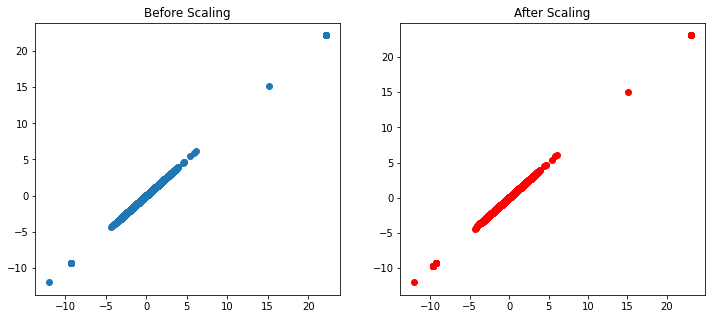

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train, X_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled, X_train_scaled,color='red')
ax2.set_title("After Scaling")
plt.show()


# below we can observe that the origin has changed after scaling 

# Model implementation

## Linear regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()
lr_scaled = LinearRegression()

In [63]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LinearRegression()

In [64]:
y_pred_lr = lr.predict(X_test)
y_pred_scaled_lr = lr_scaled.predict(X_test_scaled)

In [65]:
Train_data_score = lr.score(X_train_scaled,y_train)*100
print("Model Score for train data",Train_data_score)

Model Score for train data 88.16119652012527


In [66]:
from sklearn.metrics import r2_score
print("Actual",r2_score(y_test,y_pred_lr))
print("Scaled",r2_score(y_test,y_pred_scaled_lr))

Actual 0.8664563056932694
Scaled 0.866451043916974


In [67]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred_lr)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred_lr)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 0.2655402289540377
Mean Square Error (MSE): 0.13454544188848502
Root Mean Square Error (RMSE): 0.3668043645984669


## Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

In [69]:
RR = Ridge(alpha=0.0001)
RR_scaled = Ridge(alpha=0.0001)

In [70]:
RR.fit(X_train,y_train)
RR_scaled.fit(X_train_scaled,y_train)

Ridge(alpha=0.0001)

In [71]:
y_pred_RR = RR.predict(X_test)
y_pred_scaled_RR = RR_scaled.predict(X_test_scaled)

In [72]:
from sklearn.metrics import r2_score
print("Actual",r2_score(y_test,y_pred_RR))
print("Scaled",r2_score(y_test,y_pred_scaled_RR))

Actual 0.8664551679245062
Scaled 0.866455167925532


In [73]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred_RR)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred_RR)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_RR))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 0.26553949817640965
Mean Square Error (MSE): 0.13454658819196127
Root Mean Square Error (RMSE): 0.3668059271494413


### Before Scaling

In [74]:
alphas = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model = Ridge(alpha=a).fit(X_train,y_train)
    train_score = round(model.score(X_train,y_train)*100,2)
    score = round(model.score(X_test,y_test)*100,2)
    Y_pred = model.predict(X_test)
    mae=metrics.mean_absolute_error(y_test,y_pred_RR)
    Mse=metrics.mean_squared_error(y_test,y_pred_RR)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

Alpha:0.0001
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.0010
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.0100
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.1000
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.3000
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.5000
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.7000
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.9000
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:1.0000
,train_score:88.160000,R2:86.650000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:10.0000
,train_score:88.160000,R2:86.660000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:100.0000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806


### After Scaling

In [75]:
alphas = [0,0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model1 = Ridge(alpha=a).fit(X_train_scaled,y_train)
    train_score1 = round(model.score(X_train_scaled,y_train)*100,2)
    score1 = round(model.score(X_test_scaled,y_test)*100,2)
    Y_pred1 = model.predict(X_test_scaled)
    mae1=metrics.mean_absolute_error(y_test,y_pred_scaled_RR)
    Mse1=metrics.mean_squared_error(y_test,y_pred_scaled_RR)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

Alpha:0.0000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.0001
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.0010
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.0100
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.1000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.3000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.5000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.7000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:0.9000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:1.0000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:10.0000
,train_score:88.130000,R2:86.740000,MAE:0.265539,MSE:0.134547,RMSE:0.366806
Alpha:100.0000
,trai

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.20385e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## Lasso Regression

In [76]:
from sklearn.linear_model import Lasso

In [77]:
LR = Lasso(alpha=0.0001)
LR_scaled = Lasso(alpha=0.0001)

In [78]:
LR.fit(X_train,y_train)
LR_scaled.fit(X_train_scaled,y_train)

Lasso(alpha=0.0001)

In [79]:
y_pred_LR = LR.predict(X_test)
y_pred_scaled_LR = LR_scaled.predict(X_test_scaled)

In [80]:
from sklearn.metrics import r2_score
print("Actual",r2_score(y_test,y_pred_LR))
print("Scaled",r2_score(y_test,y_pred_scaled_LR))

Actual 0.8664426003967095
Scaled 0.8664422051363443


### Before Scaling

In [81]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred_LR)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred_LR)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 0.2655825215884763
Mean Square Error (MSE): 0.13455924999220295
Root Mean Square Error (RMSE): 0.366823186279443


### After Scaling

In [82]:
alphas = [0,0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10]
for a in alphas:
    model = Lasso(alpha=a).fit(X_train_scaled,y_train)
    train_score = round(model.score(X_train_scaled,y_train)*100,2)
    score = round(model.score(X_test_scaled,y_test)*100,2)
    Y_pred = model.predict(X_test_scaled)
    mae=metrics.mean_absolute_error(y_test,y_pred_scaled_LR)
    Mse=metrics.mean_squared_error(y_test,y_pred_scaled_LR)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_19356\1914672657.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=a).fit(X_train_scaled,y_train)
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+02, tolerance: 5.315e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imp

Alpha:0.0000
,train_score:88.160000,R2:86.650000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.0001
,train_score:88.160000,R2:86.640000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.0010
,train_score:88.160000,R2:86.620000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.0100
,train_score:87.900000,R2:86.100000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.1000
,train_score:83.490000,R2:81.400000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.3000
,train_score:64.710000,R2:63.360000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.5000
,train_score:34.250000,R2:33.520000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.7000
,train_score:10.230000,R2:9.990000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:0.9000
,train_score:0.000000,R2:-0.040000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:1.0000
,train_score:0.000000,R2:-0.040000,MAE:0.265582,MSE:0.134560,RMSE:0.366824
Alpha:10.0000
,train_score:0.000000,R2:-0.040000,MAE:0.265582,MSE:0.134560,RMSE:0.366824


## Elastic Net 

In [83]:
from sklearn.linear_model import ElasticNet

In [84]:
EN = ElasticNet(alpha=0.0001)
EN_scaled = ElasticNet(alpha=0.0001)

In [85]:
EN.fit(X_train,y_train)
EN_scaled.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.0001)

In [86]:
y_pred_EN = EN.predict(X_test)
y_pred_scaled_EN = EN_scaled.predict(X_test_scaled)

In [87]:
from sklearn.metrics import r2_score
print("Actual",r2_score(y_test,y_pred_EN))
print("Scaled",r2_score(y_test,y_pred_scaled_EN))

Actual 0.8664535683656182
Scaled 0.8664533718705554


In [88]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred_EN)
print("Mean Absolute Error (MAE):",MAE)
MSE=metrics.mean_squared_error(y_test,y_pred_EN)
print("Mean Square Error (MSE):",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_EN))
print("Root Mean Square Error (RMSE):",RMSE)

Mean Absolute Error (MAE): 0.2655584171921803
Mean Square Error (MSE): 0.13454819974957563
Root Mean Square Error (RMSE): 0.3668081238871021


### Before Scaling

In [89]:
alphas = [0,0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)
    train_score = round(model.score(X_train,y_train)*100,2)
    score = round(model.score(X_test,y_test)*100,2)
    Y_pred = model.predict(X_test)
    mae=metrics.mean_absolute_error(y_test,y_pred_EN)
    Mse=metrics.mean_squared_error(y_test,y_pred_EN)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_19356\4142645677.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = ElasticNet(alpha=a).fit(X_train,y_train)
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+02, tolerance: 5.315e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imple

Alpha:0.0000
,train_score:88.160000,R2:86.650000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.0001
,train_score:88.160000,R2:86.650000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.0010
,train_score:88.160000,R2:86.640000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.0100
,train_score:88.070000,R2:86.440000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.1000
,train_score:85.240000,R2:83.330000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.3000
,train_score:77.910000,R2:76.370000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.5000
,train_score:65.710000,R2:64.370000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.7000
,train_score:51.050000,R2:50.000000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.9000
,train_score:34.040000,R2:33.330000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:1.0000
,train_score:25.350000,R2:24.770000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:10.0000
,train_score:0.000000,R2:-0.040000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:100.0000
,train

### After Scaling

In [90]:
alphas = [0,0.0001,0.001,0.01,0.1,0.3,0.5,0.7,0.9,1,10,100]
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train_scaled,y_train)
    train_score = round(model.score(X_train_scaled,y_train)*100,2)
    score = round(model.score(X_test_scaled,y_test)*100,2)
    Y_pred = model.predict(X_test_scaled)
    mae=metrics.mean_absolute_error(y_test,y_pred_scaled_EN)
    Mse=metrics.mean_squared_error(y_test,y_pred_scaled_EN)
    print("Alpha:{0:.4f}\n,train_score:{1:4f},R2:{2:4f},MAE:{3:4f},MSE:{4:4f},RMSE:{5:4f}"
         .format(a,train_score,score,mae,Mse,np.sqrt(Mse)))

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_19356\3244763454.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = ElasticNet(alpha=a).fit(X_train_scaled,y_train)
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+02, tolerance: 5.315e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

Alpha:0.0000
,train_score:88.160000,R2:86.650000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.0001
,train_score:88.160000,R2:86.650000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.0010
,train_score:88.160000,R2:86.640000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.0100
,train_score:88.070000,R2:86.440000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.1000
,train_score:85.250000,R2:83.330000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.3000
,train_score:77.920000,R2:76.380000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.5000
,train_score:65.730000,R2:64.390000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.7000
,train_score:51.070000,R2:50.020000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:0.9000
,train_score:34.060000,R2:33.340000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:1.0000
,train_score:25.390000,R2:24.800000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:10.0000
,train_score:0.000000,R2:-0.040000,MAE:0.265558,MSE:0.134548,RMSE:0.366808
Alpha:100.0000
,train

## SVR

In [91]:
from sklearn.svm import SVR

In [92]:
Svr = SVR(kernel='rbf')

In [95]:
Svr.fit(X_train_scaled,y_train)

SVR()

In [101]:
Y_pred_scaled = Svr.predict(X_test_scaled)

In [102]:
Y_pred_scaled.shape

(592,)

In [103]:
Train_data_score = Svr.score(X_train_scaled,y_train)*100
print("Model Score for train data after scaling",Train_data_score)

Model Score for train data after scaling 97.37016399760984


In [104]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Y_pred_scaled)*100
print("score is:",score)

score is: 95.27828994161861


# END